In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

import numpy as np

import sklearn.metrics

from sklearn import tree
from sklearn import ensemble
import lightgbm as lgb

In [2]:
# load the classic iris dataset

iris = load_iris()

X = iris['data']
y = iris['target']

In [3]:
def shuffle(X, y):
    ind = np.arange(0, len(y))
    np.random.shuffle(ind)
    return [X[ind], y[ind]]

In [4]:
def accuracy(y_pred, y_true):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return np.sum(y_pred==y_true)/(y_pred.shape[0])

In [5]:
# scale data to have mean=0 and std=1 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# randomly shuffle the data
X, y = shuffle(X_scaled, y)

In [6]:
# split the data into train and test

X_train = X[:115]
y_train = y[:115]

X_test = X[115:]
y_test = y[115:]

In [7]:
# create decision tree and fit it on the data

clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

[Text(167.4, 195.696, 'X[3] <= -0.526\ngini = 0.667\nsamples = 115\nvalue = [38, 38, 39]'), Text(141.64615384615385, 152.208, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'), Text(193.15384615384616, 152.208, 'X[3] <= 0.725\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'), Text(103.01538461538462, 108.72, 'X[2] <= 0.678\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'), Text(51.50769230769231, 65.232, 'X[3] <= 0.593\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'), Text(25.753846153846155, 21.744, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'), Text(77.26153846153846, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(154.52307692307693, 65.232, 'X[3] <= 0.462\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'), Text(128.76923076923077, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(180.27692307692308, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'), Text(283.2923076923077, 108.72, 'X[2] <= 0.621\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'), Text(257.53846

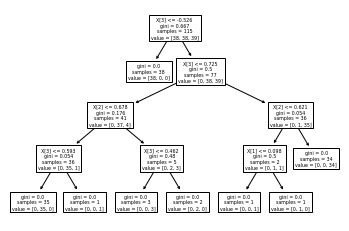

In [8]:
print(tree.plot_tree(clf_dt))

In [9]:
y_pred_dt = clf_dt.predict(X_test)

In [10]:
print("      Decision Tree\n")

print("Predicted   Ground Truth")

for pred, true in zip(y_pred_dt, y_test):
    print(pred, "         ", true)

      Decision Tree

Predicted   Ground Truth
0           0
0           0
0           0
2           2
1           1
0           0
1           1
0           0
2           2
0           0
1           1
1           1
1           1
2           2
2           2
0           0
1           1
0           0
1           1
2           2
1           1
0           0
1           1
2           2
0           0
1           2
0           0
2           2
2           2
1           1
1           1
2           2
2           2
1           1
0           0


In [11]:
print("Decision Tree accuracy: ", accuracy(y_pred_dt, y_test))

Decision Tree accuracy:  0.9714285714285714


In [12]:
# create random forest and fit it on the data

clf_rf = ensemble.RandomForestClassifier(max_depth=4)
clf_rf = clf_rf.fit(X_train, y_train)

In [13]:
y_pred_rf = clf_rf.predict(X_test)

In [14]:
print("      Random Forest\n")

print("Predicted   Ground Truth")

for pred, true in zip(y_pred_rf, y_test):
    print(pred, "         ", true)

      Random Forest

Predicted   Ground Truth
0           0
0           0
0           0
2           2
1           1
0           0
1           1
0           0
2           2
0           0
1           1
1           1
1           1
2           2
2           2
0           0
1           1
0           0
1           1
2           2
1           1
0           0
1           1
2           2
0           0
2           2
0           0
2           2
2           2
1           1
1           1
2           2
2           2
1           1
0           0


In [15]:
print("Random Forest accuracy: ", accuracy(y_pred_rf, y_test))

Random Forest accuracy:  1.0


In [16]:
# create LightGBM model

train_data = lgb.Dataset(X_train, y_train)

In [17]:
param = {'objective': 'multiclass', 'num_classes': 3, 'learning_rate': 0.05}

In [18]:
#train LightGBM model

num_round = 70
bst = lgb.train(param, train_data, num_round)

In [19]:
y_pred_lgbm = bst.predict(X_test)
y_pred_lgbm = [np.argmax(line) for line in y_pred_lgbm]

In [20]:
print("      LightGBM\n")

print("Predicted   Ground Truth")

for pred, true in zip(y_pred_lgbm, y_test):
    print(pred, "         ", true)

      LightGBM

Predicted   Ground Truth
0           0
0           0
0           0
2           2
1           1
0           0
1           1
0           0
2           2
0           0
1           1
1           1
1           1
2           2
2           2
0           0
1           1
0           0
1           1
2           2
1           1
0           0
1           1
2           2
0           0
2           2
0           0
2           2
2           2
1           1
1           1
2           2
2           2
1           1
0           0


In [21]:
print("LightGBM accuracy: ", accuracy(y_pred_lgbm, y_test))

LightGBM accuracy:  1.0
